In [1]:
!pip install scikit-learn seaborn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score
)

In [3]:
data = pd.read_csv("heart_disease_uci.csv")
print(data.shape)
data.head()

(920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# 1) Binarising the target
data['num_binary'] = (data['num'] > 0).astype(int)

# 2) Defining features X and labels y
# 'id' is just an identifier, 'dataset' is the source, and 'num' is the original label
X = data.drop(columns=['id', 'dataset', 'num', 'num_binary'])
y = data['num_binary']

# 3) One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 4) Train–test split (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Total samples:", len(data))
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
print("Number of features after encoding:", X_train.shape[1])

Total samples: 920
Training samples: 736
Test samples: 184
Number of features after encoding: 18


In [9]:
X_train_imputed = X_train.fillna(X_train.mean())
X_test_imputed  = X_test.fillna(X_train.mean())

# Linear SVM
svm_linear = SVC(
    kernel='linear',
    C=1.0,
    probability=True,
    random_state=42
)
svm_linear.fit(X_train_imputed, y_train)

# RBF SVM
svm_rbf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)
svm_rbf.fit(X_train_imputed, y_train)


SVC(probability=True, random_state=42)

In [13]:
def evaluate_model(model, X_test, y_test, name="model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    acc   = accuracy_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred)
    rec   = recall_score(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_prob)

    print(f"{name} - Accuracy:  {acc:.3f}")
    print(f"{name} - Precision: {prec:.3f}")
    print(f"{name} - Recall:    {rec:.3f}")
    print(f"{name} - F1-score:  {f1:.3f}")
    print(f"{name} - AUROC:     {auroc:.3f}")

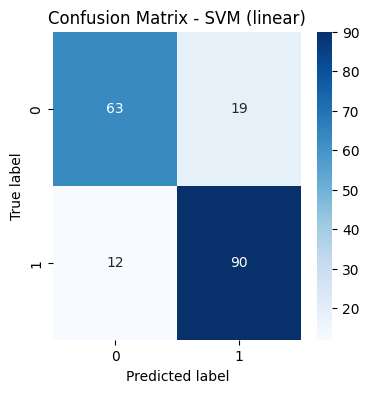

SVM (linear) - Accuracy:  0.832
SVM (linear) - Precision: 0.826
SVM (linear) - Recall:    0.882
SVM (linear) - F1-score:  0.853
SVM (linear) - AUROC:     0.908


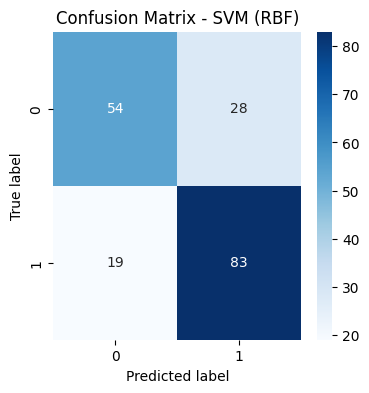

SVM (RBF) - Accuracy:  0.745
SVM (RBF) - Precision: 0.748
SVM (RBF) - Recall:    0.814
SVM (RBF) - F1-score:  0.779
SVM (RBF) - AUROC:     0.775


In [14]:
evaluate_model(svm_linear, X_test_imputed, y_test, name="SVM (linear)")
evaluate_model(svm_rbf,   X_test_imputed, y_test, name="SVM (RBF)")